# **07‐01 퍼셉트론 (Perceptron)**
- 인공신경망은 수 많은 머신러닝 방법 중 하나입니다. 하지만 최근 인공신경망을 복잡하게 쌓아 올린 딥 러닝이 다른 머신 러닝 방법들을 뛰어 넘는 성능을 보여주는 사례가 늘면서, 전통적인 머신러닝과 딥러닝을 구분해서 이해해야 한다는 목소리가 커지고 있습니다. 딥러닝을 이해하기 위해서는 우선 인공신경망에 대한 이해가 필요한데, 여기서는 초기의 인공신경망인 퍼셉트론(Perceptron)에 대해서 이해합니다.

**1. 퍼셉트론 (Perceptron)**
- 퍼셉트론(Perceptron)은 프랑크 로젠블라트(Frank Rosenblatt)가 1957년에 제안한 초기 형태의 인공신경망으로 다수의 입력으로 부터 하나의 결과를 내보내는 알고리즘입니다. 퍼셉트론은 실제 뇌를 구성 하는 신경 세포 뉴런의 동작과 유사한데, 신경 세포 뉴런의 그림을 먼저 보도록 하겠습니다. 뉴런은 가지 돌기에서 신호를 받아들이고, 이 신호가 일정치 이상의 크기를 가지면 축삭돌기를 통해서 신호를 전달합니다.

In [7]:
def AND_gate(x1, x2):
  w1 = 0.5
  w2 = 0.5
  b = -0.7
  result = x1*w1 + x2*x2 + b
  if result <= 0:
    return 0
  else:
    return 1

In [8]:
AND_gate(0,0), AND_gate(0,1), AND_gate(1,0), AND_gate(1,1)

(0, 1, 0, 1)

In [9]:
def NAND_gate(x1, x2):
  w1 = -0.5
  w2 = -0.5
  b = 0.7
  result = x1*w1 + x2*w2 + b
  if result <= 0:
    return 0
  else:
    return 1

In [10]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

In [11]:
def OR_gate(x1, x2):
  w1 = 0.6
  w2 = 0.6
  b = -0.5
  result = x1*w1 + x2*w2 + b
  if result <= 0:
    return 0
  else:
    return 1

In [12]:
OR_gate(0, 0), OR_gate(0, 1), OR_gate(1, 0), OR_gate(1, 1)

(0, 1, 1, 1)

# **3. 다층 퍼셉트론 (MultiLayer Perceptron, MLP)**
XOR 게이트는 기존의 AND, NAND, OR 게이트를 조합하면 만들 수 있습니다. 퍼셉트론 관점에서 말하면 층을 더 쌓으면 만들 수 있습니다. 다층 퍼셉트론과 단층 퍼셉트론의 차이는 단층 퍼셉트론은 입력층과 출 력층만 존재하지만, 다층 퍼셉트론은 중간에 층을 더 추가하였다는 점입니다. 이렇게 입력층과 출력층 사 이에 존재하는 층을 **은닉층(hidden layer)** 이라고 합니다. 즉, 다층 퍼셉트론은 중간에 은닉층이 존재한 다는 점이 단층 퍼셉트론과 다릅니다. 다층 퍼셉트론은 줄여서 MLP 라고도 부릅니다.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

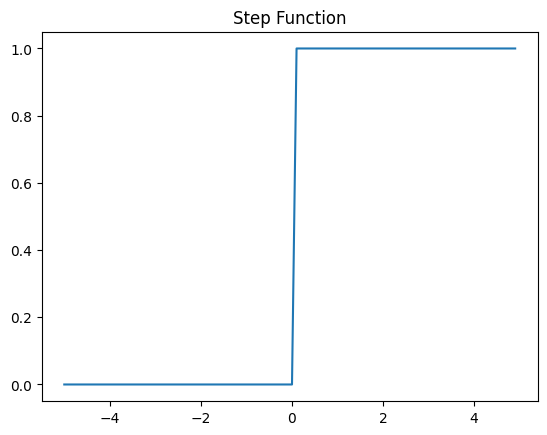

In [16]:
def step(x):
  return np.array(x > 0, dtype = int)

x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)

plt.title('Step Function')
plt.plot(x,y)
plt.show()

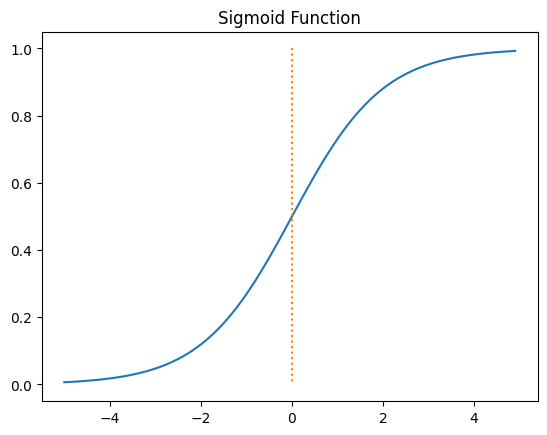

In [17]:
#시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
  return 1/(1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0, 0], [1.0, 0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

**(4) 하이퍼볼릭탄젠트 함수 (Hyperbolic tangent function)**
- 하이퍼볼릭탄젠트 함수 (tanh) 는 입력값을 ‐1 과 1 사이의 값으로 변환합니다. 그래프를 그려보겠습니
다.

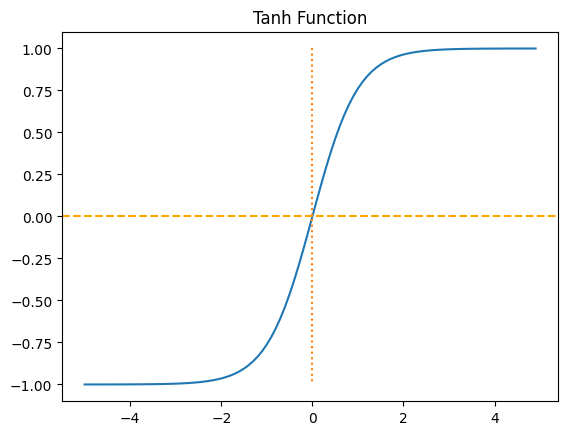

In [18]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0], [1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

**(5) 렐루 함수 (ReLU)**
- 인공 신경망의 은닉층에서 가장 인기있는 함수입니다. 수식은 𝑓 (𝑥) = 𝑚𝑎𝑥(0, 𝑥) 로 아주 간단합니다.

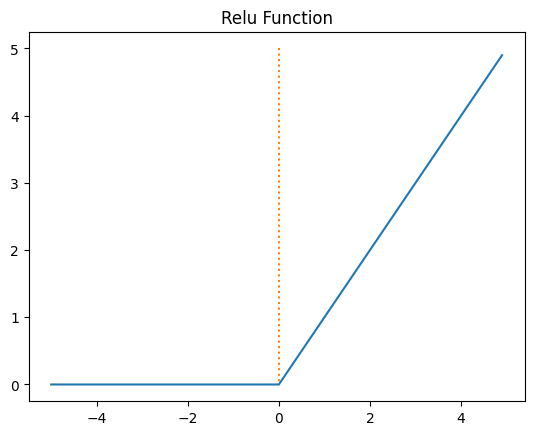

In [19]:
def relu(X):
  return np.maximum(0, x)
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x,y)
plt.plot([0, 0 ],[5.0, 0.0], ':')
plt.title('Relu Function')
plt.show()

**(6) 리키 렐루 (Leaky ReLU)**
- 죽은 렐루를 보완하기 위해 ReLU 의 변형 함수들이 등장하기 시작했습니다. 변형 함수는 여러 개가 있지 만 여기서는 Leaky ReLU 에 대해서만 소개합니다. Leaky ReLU 는 입력값이 음수일 경우에 0 이 아니라 0.001 과 같은 매우 작은 수를 반환하도록 되어있습니다. 수식은 𝑓 (𝑥) = 𝑚𝑎𝑥(𝑎𝑥, 𝑥) 로 아주 간단합니 다. a 는 하이퍼파라미터로 Leaky(‘새는’) 정도를 결정하며 일반적으로는 0.01 의 값을 가집니다. 여기서 말하는’ 새는 정도’ 라는 것은 입력값의 음수일 때의 기울기를 비유하고 있습니다.

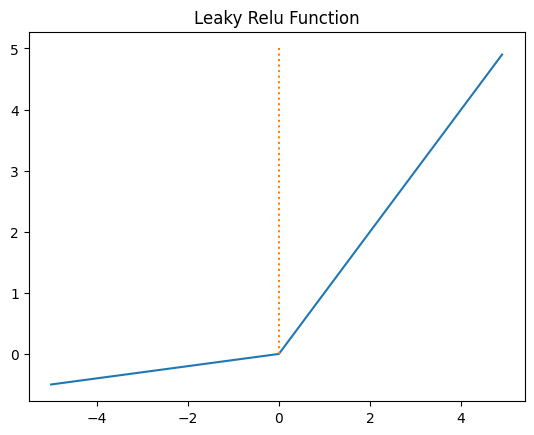

In [21]:
a = 0.1

def leaky_leru(x):
  return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_leru(x)

plt.plot(x, y)
plt.plot([0,0], [5.0,0.0], ':')
plt.title('Leaky Relu Function')
plt.show()

**(7) 소프트맥스 함수 (Softmax function)**
- 은닉층에서는 ReLU(또는 ReLU 변형) 함수들을 사용하는 것이 일반적입니다. 반면, 소프트맥스 함수는 시그모이드 함수처럼 출력층에서 주로 사용됩니다. 시그모이드 함수가 두 가지 선택지 중 하나를 고르는 이 진 분류 (Binary Classification) 문제에 사용된다면 소프트맥스 함수는 세 가지 이상의 (상호 배타적인) 선 택지 중 하나를 고르는 다중 클래스 분류 (MultiClass Classification) 문제에 주로 사용됩니다. 다시 말해서 딥러닝으로 이진분류를 할 때는 출력층에 앞서 배운 로지스틱회귀를사 용하고,딥러닝으로 다중 클래스 분류 문제를 풀 때는 출력층에 소프트맥스 회귀를 사용한다고 생각할 수 있습니다.

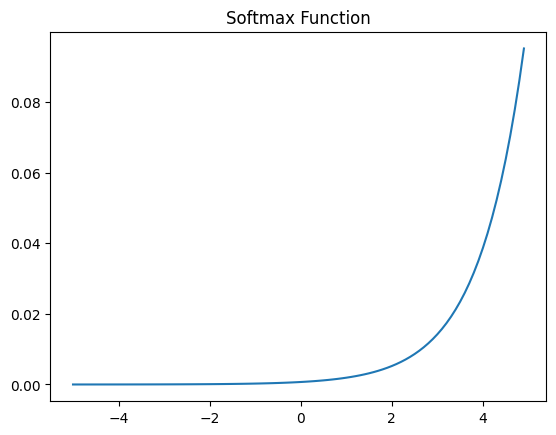

In [22]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()